In [470]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge,LogisticRegression
from math import sqrt
from sklearn.svm import LinearSVR

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,StackingRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [471]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [472]:
data = pd.read_csv("/content/cars.csv")
data.head()
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [473]:
data.corr()

<ipython-input-473-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
odometer_value,1.000000,-0.487104,0.057561,0.104807,-0.182399,-0.419871,0.044549,-0.142429,-0.021483,0.108909,-0.153161,-0.077026,-0.230142,-0.068129,-0.242305,-0.167142,-0.255420,-0.210345,-0.089626,-0.001519
year_produced,-0.487104,1.000000,-0.074460,0.006144,0.201642,0.704930,-0.060353,0.257071,0.008482,-0.350971,0.427844,0.206194,0.432954,0.185974,0.437130,0.346948,0.458580,0.468166,0.249740,-0.015877
engine_has_gas,0.057561,-0.074460,1.000000,0.084492,-0.019935,-0.062343,0.018887,-0.031959,-0.000007,0.004374,-0.008275,-0.012108,-0.027112,0.003455,-0.031259,-0.030201,-0.036682,-0.042115,-0.006030,0.018133
engine_capacity,0.104807,0.006144,0.084492,1.000000,-0.051316,0.297747,0.082439,0.107231,0.078991,-0.141322,0.133731,0.375572,0.243276,0.452425,0.272972,0.284254,0.201842,0.239754,0.245394,0.079740
has_warranty,-0.182399,0.201642,-0.019935,-0.051316,1.000000,0.285028,0.111518,0.080261,-0.021453,0.141179,-0.115877,-0.043588,-0.032610,-0.043844,-0.040650,-0.018221,-0.021075,-0.054139,-0.088888,-0.058830
price_usd,-0.419871,0.704930,-0.062343,0.297747,0.285028,1.000000,-0.002153,0.316197,0.057863,-0.226565,0.257755,0.339114,0.472106,0.337260,0.435791,0.452598,0.499640,0.450698,0.267831,0.034452
is_exchangeable,0.044549,-0.060353,0.018887,0.082439,0.111518,-0.002153,1.000000,0.102797,0.106688,0.011832,-0.036612,0.046427,-0.028649,0.010929,-0.021834,0.001227,-0.021063,0.001669,0.032613,0.027747
number_of_photos,-0.142429,0.257071,-0.031959,0.107231,0.080261,0.316197,0.102797,1.000000,0.074138,-0.107836,0.088601,0.131532,0.178209,0.137762,0.163172,0.184114,0.192965,0.198072,0.133164,-0.027725
up_counter,-0.021483,0.008482,-0.000007,0.078991,-0.021453,0.057863,0.106688,0.074138,1.000000,-0.021965,0.043095,0.040639,0.032738,0.050791,0.039138,0.033295,0.035214,0.063410,0.036886,0.698106
feature_0,0.108909,-0.350971,0.004374,-0.141322,0.141179,-0.226565,0.011832,-0.107836,-0.021965,1.000000,-0.676256,-0.291905,-0.335435,-0.306736,-0.404199,-0.246833,-0.325240,-0.458184,-0.638299,-0.067980


In [474]:
data.drop(["engine_has_gas", "is_exchangeable", "duration_listed","up_counter"], axis=1, inplace=True)

In [475]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38481 entries, 0 to 38530
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38481 non-null  object 
 1   model_name         38481 non-null  object 
 2   transmission       38481 non-null  object 
 3   color              38481 non-null  object 
 4   odometer_value     38481 non-null  int64  
 5   year_produced      38481 non-null  int64  
 6   engine_fuel        38481 non-null  object 
 7   engine_type        38481 non-null  object 
 8   engine_capacity    38481 non-null  float64
 9   body_type          38481 non-null  object 
 10  has_warranty       38481 non-null  bool   
 11  state              38481 non-null  object 
 12  drivetrain         38481 non-null  object 
 13  price_usd          38481 non-null  float64
 14  location_region    38481 non-null  object 
 15  number_of_photos   38481 non-null  int64  
 16  feature_0          384

In [476]:
data.corr()

<ipython-input-476-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,odometer_value,year_produced,engine_capacity,has_warranty,price_usd,number_of_photos,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
odometer_value,1.000000,-0.487104,0.104807,-0.182399,-0.419871,-0.142429,0.108909,-0.153161,-0.077026,-0.230142,-0.068129,-0.242305,-0.167142,-0.255420,-0.210345,-0.089626
year_produced,-0.487104,1.000000,0.006144,0.201642,0.704930,0.257071,-0.350971,0.427844,0.206194,0.432954,0.185974,0.437130,0.346948,0.458580,0.468166,0.249740
engine_capacity,0.104807,0.006144,1.000000,-0.051316,0.297747,0.107231,-0.141322,0.133731,0.375572,0.243276,0.452425,0.272972,0.284254,0.201842,0.239754,0.245394
has_warranty,-0.182399,0.201642,-0.051316,1.000000,0.285028,0.080261,0.141179,-0.115877,-0.043588,-0.032610,-0.043844,-0.040650,-0.018221,-0.021075,-0.054139,-0.088888
price_usd,-0.419871,0.704930,0.297747,0.285028,1.000000,0.316197,-0.226565,0.257755,0.339114,0.472106,0.337260,0.435791,0.452598,0.499640,0.450698,0.267831
number_of_photos,-0.142429,0.257071,0.107231,0.080261,0.316197,1.000000,-0.107836,0.088601,0.131532,0.178209,0.137762,0.163172,0.184114,0.192965,0.198072,0.133164
feature_0,0.108909,-0.350971,-0.141322,0.141179,-0.226565,-0.107836,1.000000,-0.676256,-0.291905,-0.335435,-0.306736,-0.404199,-0.246833,-0.325240,-0.458184,-0.638299
feature_1,-0.153161,0.427844,0.133731,-0.115877,0.257755,0.088601,-0.676256,1.000000,0.253052,0.324797,0.267467,0.398876,0.242320,0.316571,0.453761,0.395772
feature_2,-0.077026,0.206194,0.375572,-0.043588,0.339114,0.131532,-0.291905,0.253052,1.000000,0.437105,0.484560,0.422555,0.419034,0.387747,0.411958,0.373465
feature_3,-0.230142,0.432954,0.243276,-0.032610,0.472106,0.178209,-0.335435,0.324797,0.437105,1.000000,0.398800,0.496029,0.502583,0.522387,0.508668,0.377930


In [477]:
# class CategoricalEncoder(BaseEstimator, TransformerMixin):
#   def fit(self, X, y=None):
#         return self
#   def transform(self, X):
#       X["transmission"] = X["transmission"].map({"automatic": 0,"mechanical":1 })
#       X['has_warranty'] = (~X['has_warranty']).astype(np.byte)
#       X["state"] = X["state"].map({"owned": 1,"new":2, "emergency":0 })
#       for i in range(10):
#         X[f'feature_{i}'] = (~X[f'feature_{i}']).astype(np.byte)
#       return X

from encoder import CategoricalEncoder

In [478]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38481 entries, 0 to 38530
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38481 non-null  object 
 1   model_name         38481 non-null  object 
 2   transmission       38481 non-null  object 
 3   color              38481 non-null  object 
 4   odometer_value     38481 non-null  int64  
 5   year_produced      38481 non-null  int64  
 6   engine_fuel        38481 non-null  object 
 7   engine_type        38481 non-null  object 
 8   engine_capacity    38481 non-null  float64
 9   body_type          38481 non-null  object 
 10  has_warranty       38481 non-null  bool   
 11  state              38481 non-null  object 
 12  drivetrain         38481 non-null  object 
 13  price_usd          38481 non-null  float64
 14  location_region    38481 non-null  object 
 15  number_of_photos   38481 non-null  int64  
 16  feature_0          384

array([[<Axes: title={'center': 'odometer_value'}>,
        <Axes: title={'center': 'year_produced'}>],
       [<Axes: title={'center': 'engine_capacity'}>,
        <Axes: title={'center': 'price_usd'}>],
       [<Axes: title={'center': 'number_of_photos'}>, <Axes: >]],
      dtype=object)

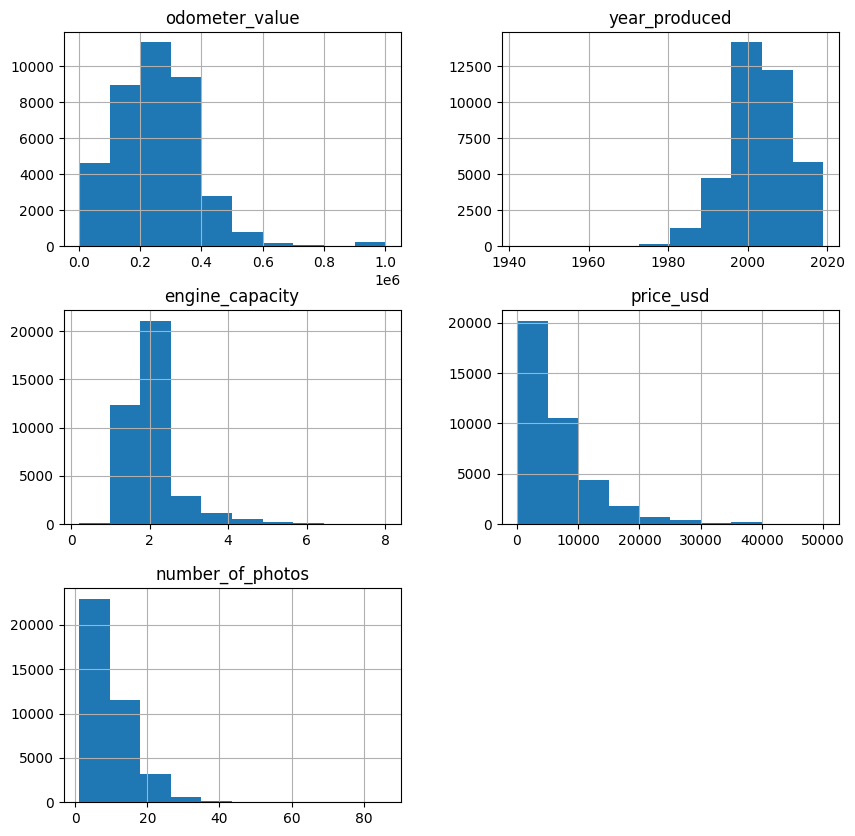

In [479]:
data.hist(figsize = (10,10))

In [480]:
data["odometer_value"] = np.log(data["odometer_value"]+1)
data["number_of_photos"] = np.log(data["number_of_photos"]+1)

array([[<Axes: title={'center': 'odometer_value'}>,
        <Axes: title={'center': 'year_produced'}>],
       [<Axes: title={'center': 'engine_capacity'}>,
        <Axes: title={'center': 'price_usd'}>],
       [<Axes: title={'center': 'number_of_photos'}>, <Axes: >]],
      dtype=object)

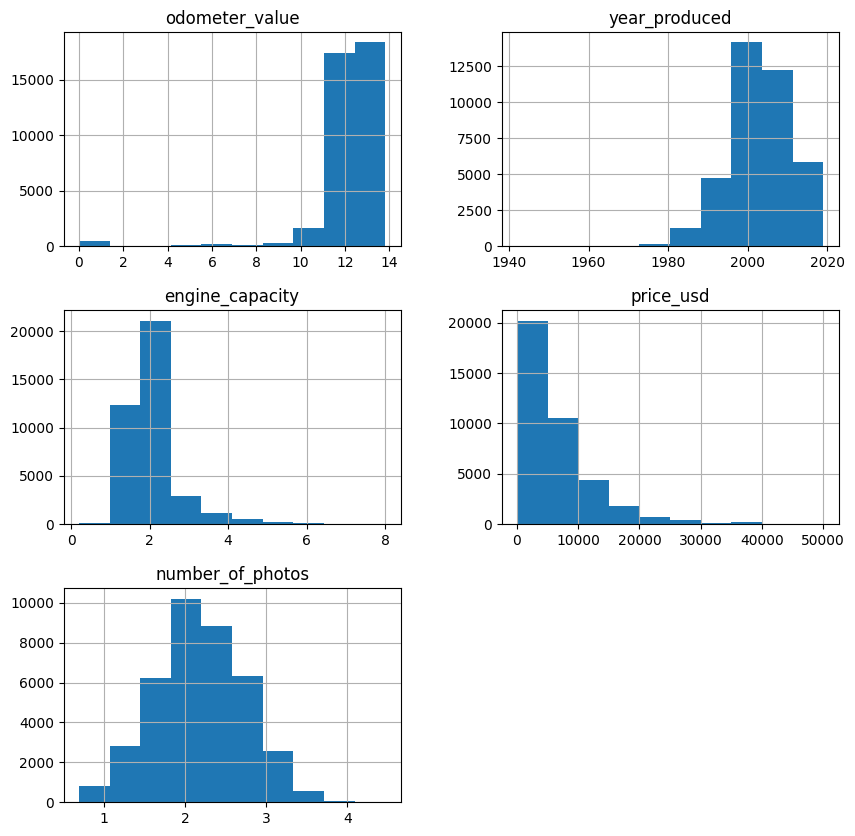

In [481]:
data.hist(figsize = (10,10))

In [482]:
data.corr()

<ipython-input-482-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,odometer_value,year_produced,engine_capacity,has_warranty,price_usd,number_of_photos,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
odometer_value,1.000000,-0.308583,0.091749,-0.655609,-0.381523,-0.094474,-0.108321,0.065690,0.023394,-0.046012,0.027472,-0.042329,-0.030976,-0.065297,-0.010880,0.063191
year_produced,-0.308583,1.000000,0.006144,0.201642,0.704930,0.257966,-0.350971,0.427844,0.206194,0.432954,0.185974,0.437130,0.346948,0.458580,0.468166,0.249740
engine_capacity,0.091749,0.006144,1.000000,-0.051316,0.297747,0.097034,-0.141322,0.133731,0.375572,0.243276,0.452425,0.272972,0.284254,0.201842,0.239754,0.245394
has_warranty,-0.655609,0.201642,-0.051316,1.000000,0.285028,0.087439,0.141179,-0.115877,-0.043588,-0.032610,-0.043844,-0.040650,-0.018221,-0.021075,-0.054139,-0.088888
price_usd,-0.381523,0.704930,0.297747,0.285028,1.000000,0.291290,-0.226565,0.257755,0.339114,0.472106,0.337260,0.435791,0.452598,0.499640,0.450698,0.267831
number_of_photos,-0.094474,0.257966,0.097034,0.087439,0.291290,1.000000,-0.125953,0.104636,0.128025,0.172572,0.135900,0.162941,0.169752,0.184095,0.199194,0.143243
feature_0,-0.108321,-0.350971,-0.141322,0.141179,-0.226565,-0.125953,1.000000,-0.676256,-0.291905,-0.335435,-0.306736,-0.404199,-0.246833,-0.325240,-0.458184,-0.638299
feature_1,0.065690,0.427844,0.133731,-0.115877,0.257755,0.104636,-0.676256,1.000000,0.253052,0.324797,0.267467,0.398876,0.242320,0.316571,0.453761,0.395772
feature_2,0.023394,0.206194,0.375572,-0.043588,0.339114,0.128025,-0.291905,0.253052,1.000000,0.437105,0.484560,0.422555,0.419034,0.387747,0.411958,0.373465
feature_3,-0.046012,0.432954,0.243276,-0.032610,0.472106,0.172572,-0.335435,0.324797,0.437105,1.000000,0.398800,0.496029,0.502583,0.522387,0.508668,0.377930


In [483]:
data.info()
data.drop(["color" ,"location_region"], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38481 entries, 0 to 38530
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38481 non-null  object 
 1   model_name         38481 non-null  object 
 2   transmission       38481 non-null  object 
 3   color              38481 non-null  object 
 4   odometer_value     38481 non-null  float64
 5   year_produced      38481 non-null  int64  
 6   engine_fuel        38481 non-null  object 
 7   engine_type        38481 non-null  object 
 8   engine_capacity    38481 non-null  float64
 9   body_type          38481 non-null  object 
 10  has_warranty       38481 non-null  bool   
 11  state              38481 non-null  object 
 12  drivetrain         38481 non-null  object 
 13  price_usd          38481 non-null  float64
 14  location_region    38481 non-null  object 
 15  number_of_photos   38481 non-null  float64
 16  feature_0          384

In [484]:
data.to_csv('preproc.csv', index=False)

In [485]:
OneHotEncoder,
preprocessing_pipeline = Pipeline([("encoder_categorical", CategoricalEncoder()),("one", OneHotEncoder(handle_unknown="ignore")), ])


In [486]:
pipeline = make_pipeline(preprocessing_pipeline, LinearRegression())

In [487]:
def metric(y_test,y_pred ):
  print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
  print(f'MSE: {mean_squared_error(y_test, y_pred)}')
  print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
  print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
  print(f'R^2: {r2_score(y_test, y_pred)}')

In [488]:
X = data.drop(["price_usd"], axis=1)
y = data["price_usd"]

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [490]:
linreg = pipeline.fit(X_train, y_train)

In [491]:
predictions = pipeline.predict(X_test)
metric(y_test,predictions)

MAE: 1393.2860019844206
MSE: 5238116.061117445
RMSE: 2288.6930901974265
MAPE: 0.7116656614962104
R^2: 0.8686696426109048


In [492]:
def tuning_params(estimator, param, X_train, y_train):
  search = RandomizedSearchCV(estimator,param_distributions=param, )
  search.fit(X_train, y_train)
  print(search.best_estimator_)
  return search

In [493]:
pipeline_ridge = make_pipeline(preprocessing_pipeline, Ridge())
parameters = {'ridge__alpha':[1, 10, 0.1]}
model = tuning_params(pipeline_ridge, parameters, X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('encoder_categorical', CategoricalEncoder()),
                                 ('one',
                                  OneHotEncoder(handle_unknown='ignore'))])),
                ('ridge', Ridge(alpha=1))])


In [494]:
pipeline_ridge = make_pipeline(preprocessing_pipeline, Ridge(alpha=1))
pipeline_ridge.fit(X_train,y_train)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('encoder_categorical', CategoricalEncoder()),
                                 ('one',
                                  OneHotEncoder(handle_unknown='ignore'))])),
                ('ridge', Ridge(alpha=1))])

In [495]:
predictions = pipeline_ridge.predict(X_test)
metric(y_test,predictions)

MAE: 1455.8617377605126
MSE: 5225993.151684575
RMSE: 2286.0431211341083
MAPE: 1.0155197410907786
R^2: 0.8689735889171413


In [496]:
import joblib
joblib.dump(pipeline_ridge, "ridge.pkl")

['ridge.pkl']

In [497]:
model = joblib.load("ridge.pkl")
predictions = model.predict(X_test)
metric(y_test,predictions)

MAE: 1369.5562264973512
MSE: 4846374.794837935
RMSE: 2201.4483402610053
MAPE: 0.8629818455175989
R^2: 0.8784914029354688


In [498]:
! pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [499]:
%%writefile encoder.py
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
class CategoricalEncoder(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
        return self
  def transform(self, X):
      X["transmission"] = X["transmission"].map({"automatic": 0,"mechanical":1 })
      X['has_warranty'] = (~X['has_warranty']).astype(np.byte)
      X["state"] = X["state"].map({"owned": 1,"new":2, "emergency":0 })
      for i in range(10):
        X[f'feature_{i}'] = (~X[f'feature_{i}']).astype(np.byte)
      return X

Overwriting encoder.py


In [500]:
%%writefile app.py
import pandas as pd
import streamlit as st
from PIL import Image
from encoder import CategoricalEncoder
st.set_page_config(page_title='Информация о датасете',
                   page_icon=':bar_chart:', layout="wide")

st.title("Информация о датасете")
st.sidebar.title("")
c1, c2, c3 = st.columns(3)
with c1:
    st.info("""
    Описание
    - Датасет посвящен игре Counter-Strike: Global Offensive.
    - В нем содержится информация о раундах для каждой из команд.
    - Предназначен для бинарной классификации.
    - Целевой признак - поставлена ли бомба либо нет для каждого раунда.""")
with c2:

    st.info("""
Признаки
- time_left - оставшееся время
- ct_score, t_score - счет
- ct_health, t_health - количество здоровья
- ct_armor, t_armor - количество армора
- ct_money	t_money - общее количество денег
- ct_players_alive, t_players_alive - количество живых
- map - название игровой карты
- bomb_planted - стоит ли бомба (да, нет)
""")
with c3:
    st.info("""
   Особенности предобработки данных:
- Один категориальный признак - (one-hot encoding)
- Дизбаланс классов - (under-sampling | over-sampling)
- Разброс числовых данных (standart scaling)

    """)

data = pd.read_csv("preproc.csv")
data.dropna(inplace=True)
st.session_state["data"] = data
st.write(data)
if __name__ == '__main__':

    from encoder import CategoricalEncoder
    main()


Overwriting app.py


In [501]:
!mkdir pages

mkdir: cannot create directory ‘pages’: File exists


In [502]:
%%writefile pages/predict.py
import joblib
from encoder import CategoricalEncoder
import numpy as np
import streamlit as st
import pandas as pd
st.set_page_config(layout="centered")
st.title("Получение предсказания")
left, right = st.columns(2)

data = st.session_state["data"]
manufacturer_name = st.selectbox("Карта", data["manufacturer_name"].unique())
model_name = st.text_input("Модель")
transmission = st.selectbox("Трансмиссия", data["transmission"].unique())
odometer_value = st.number_input("Пробег", min_value=0)
year_produced = st.number_input("Год", min_value=2000)
engine_type = st.selectbox("Карта", data["engine_type"].unique())
engine_capacity = st.number_input("Емкость двигателя", min_value=0)
body_type = st.selectbox("body_type", data["body_type"].unique())
has_warranty = st.checkbox('has_warranty')
state = st.selectbox("state", data["state"].unique())
drivetrain = st.selectbox("drivetrain", data["drivetrain"].unique())
number_of_photos = st.number_input("number_of_photos", min_value=0)
feature_0 = st.checkbox('feature_0')
feature_1 = st.checkbox('feature_1')
feature_2 = st.checkbox('feature_2')
feature_3 = st.checkbox('feature_3')
feature_4 = st.checkbox('feature_4')
feature_5 = st.checkbox('feature_5')
feature_6 = st.checkbox('feature_6')
feature_7 = st.checkbox('feature_7')
feature_8 = st.checkbox('feature_8')
feature_9 = st.checkbox('feature_9')
button_click = st.button("Predict", )
model = st.selectbox(
    "Модель", ["Bagging Classifier", "Decision Tree", "Neural Network"])

if button_click:
    row = np.array(
        [[manufacturer_name, model_name, transmission, odometer_value, year_produced, engine_type, engine_type, engine_capacity, body_type, has_warranty,
          state,  drivetrain, number_of_photos, feature_0, feature_1, feature_2,  feature_3, feature_4, feature_5, feature_6, feature_7, feature_8, feature_9]])
    dataframe_test = pd.DataFrame(
        row, columns=data.drop(["price_usd"], axis=1).columns)
    pipeline = joblib.load(f"ridge.joblib")
    pred = pipeline.predict(dataframe_test)
    st.write(pred)


Overwriting pages/predict.py


In [503]:
%%writefile pages/vis.py
from encoder import CategoricalEncoder
import numpy as np
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
st.set_page_config(layout="wide")
data = st.session_state["data"]

if 'indexone' not in st.session_state:
    st.session_state.indexone = 0
if 'indextwo' not in st.session_state:
    st.session_state.indextwo = 0

if 'featuresone' not in st.session_state:
    st.session_state.featuresone = tuple(data.drop([""]).columns)

if 'featurestwo' not in st.session_state:
    st.session_state.featurestwo = tuple(data.columns)
st.title("Визуализация данных")
tab1, tab2, tab3 = st.tabs(
    ["Гистограмма", "Ящик с усами", "Тепловая карта"])


with tab1:

    col1, col2 = st.columns(2)
    st.selectbox("Выберите признак", options=st.session_state.featuresone,
                 index=st.session_state.indexone, key='featureone')
    st.session_state.indexone = st.session_state.featureone.index(
        st.session_state.featureone)
    x = data[st.session_state.featureone]
    st.info("На графике мы можем увидеть количественную характеристику значений каждого отдельно взятого признака относительно целевого.")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.histplot(data, x=st.session_state.featureone,
                 hue='price_usd', multiple="stack")
    plt.xlabel(st.session_state.featureone)
    plt.ylabel("Количество")
    st.pyplot(fig)


with tab2:

    col1, col2 = st.columns(2)

    with col1:

        st.selectbox("Выберите признак", options=st.session_state.featurestwo,
                     index=st.session_state.indextwo, key='featuretwo')
        st.session_state.indextwo = st.session_state.featurestwo.index(
            st.session_state.featuretwo)
        x = data[st.session_state.featuretwo]
        st.info(
            "Ящик с усами позволяет найти числовые характеристики случайных величин.")

    with col2:

        fig, ax = plt.subplots(figsize=(10, 9))
        sns.boxplot(
            data=data, x=data[st.session_state.featuretwo])
        plt.xlabel(st.session_state.featuretwo)
        st.pyplot(fig)
with tab3:
    col1, col2 = st.columns(2)
    with col1:
        st.info("Тепловая карта позволяет увидеть кореляцию между признаками. Мы можем увидеть, что признаки с одинаковой семантикой противоположных сторон коррелируют между собой.")
    with col2:
        correlation_matrix = data.corr()
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, ax=ax)
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        st.pyplot(fig)


Overwriting pages/vis.py


In [504]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.821s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [505]:
! curl https://ipinfo.io/ip

34.168.241.252

In [506]:
!streamlit run /content/app.py &>/content/logs.txt &

In [507]:
! fuser -k 8501/tcp

In [508]:
!npx localtunnel --port 8501

npx: installed 22 in 3.169s
your url is: https://sad-otters-shout.loca.lt
^C
